# Equilibrium Properties and Partial Ordering (Al-Fe and Al-Ni)

In [1]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('bmh')

In [2]:
import matplotlib.pyplot as plt
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v
import numpy as np

## Al-Fe (Heat Capacity and Degree of Ordering)
Here we compute equilibrium thermodynamic properties in the Al-Fe system. We know that only B2 and liquid are stable in the temperature range of interest, but we just as easily could have included all the phases in the calculation using `my_phases = list(db.phases.keys())`. Notice that the syntax for specifying a range is `(min, max, step)`. We can also directly specify a list of temperatures using the list syntax, e.g., `[300, 400, 500, 1400]`.

We explicitly indicate that we want to compute equilibrium values of the `heat_capacity` and `degree_of_ordering` properties. These are both defined in the default `Model` class. For a complete list, see the documentation. `equilibrium` will always return the Gibbs energy, chemical potentials, phase fractions and site fractions, regardless of the value of `output`.

In [3]:
db = Database('alfe_sei.TDB')
my_phases = ['LIQUID', 'B2_BCC']
eq = equilibrium(db, ['AL', 'FE', 'VA'], my_phases, {v.X('AL'): 0.25, v.T: (300, 2000, 50), v.P: 101325},
                 output=['heat_capacity', 'degree_of_ordering'])
print(eq)

<xarray.Dataset>
Dimensions:             (P: 1, T: 34, X_AL: 1, component: 2, internal_dof: 5, vertex: 2)
Coordinates:
  * P                   (P) float64 1.013e+05
  * T                   (T) float64 300.0 350.0 400.0 450.0 500.0 550.0 ...
  * X_AL                (X_AL) float64 0.25
  * vertex              (vertex) int64 0 1
  * component           (component) object 'AL' 'FE'
  * internal_dof        (internal_dof) int64 0 1 2 3 4
Data variables:
    MU                  (P, T, X_AL, component) float64 -7.274e+04 ...
    GM                  (P, T, X_AL) float64 -2.858e+04 -2.994e+04 -3.15e+04 ...
    NP                  (P, T, X_AL, vertex) float64 1.0 nan 1.0 nan 1.0 nan ...
    X                   (P, T, X_AL, vertex, component) float64 0.25 0.75 ...
    Y                   (P, T, X_AL, vertex, internal_dof) float64 0.5 0.5 ...
    Phase               (P, T, X_AL, vertex) object 'B2_BCC' '' 'B2_BCC' '' ...
    degree_of_ordering  (P, T, X_AL, vertex) float64 0.6666 nan 0.6665 nan ...

We also compute degree of ordering at fixed temperature as a function of composition.

In [4]:
eq2 = equilibrium(db, ['AL', 'FE', 'VA'], 'B2_BCC', {v.X('AL'): (0,1,0.01), v.T: 700, v.P: 101325},
                  output='degree_of_ordering')
print(eq2)

<xarray.Dataset>
Dimensions:             (P: 1, T: 1, X_AL: 100, component: 2, internal_dof: 5, vertex: 2)
Coordinates:
  * P                   (P) float64 1.013e+05
  * T                   (T) float64 700.0
  * X_AL                (X_AL) float64 1e-09 0.01 0.02 0.03 0.04 0.05 0.06 ...
  * vertex              (vertex) int64 0 1
  * component           (component) object 'AL' 'FE'
  * internal_dof        (internal_dof) int64 0 1 2 3 4
Data variables:
    MU                  (P, T, X_AL, component) float64 -2.312e+05 ...
    GM                  (P, T, X_AL) float64 -2.447e+04 -2.565e+04 ...
    NP                  (P, T, X_AL, vertex) float64 1.0 nan 1.0 nan 1.0 nan ...
    X                   (P, T, X_AL, vertex, component) float64 1e-09 1.0 ...
    Y                   (P, T, X_AL, vertex, internal_dof) float64 1e-09 1.0 ...
    Phase               (P, T, X_AL, vertex) object 'B2_BCC' '' 'B2_BCC' '' ...
    degree_of_ordering  (P, T, X_AL, vertex) float64 1.137e-15 nan 2.015e-16 ...
Att

### Plots
Next we plot the degree of ordering versus temperature. We can see that the decrease in the degree of ordering is relatively steady and continuous. This is indicative of a second-order transition from partially ordered B2 to disordered bcc (A2).

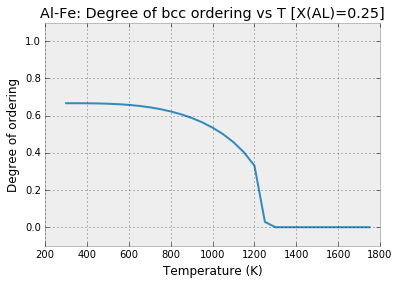

In [5]:
plt.gca().set_title('Al-Fe: Degree of bcc ordering vs T [X(AL)=0.25]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Degree of ordering')
plt.gca().set_ylim((-0.1,1.1))
# Generate a list of all indices where B2 is stable
phase_indices = np.nonzero(eq.Phase.values == 'B2_BCC')
# phase_indices[1] refers to all temperature indices
# We know this because pycalphad always returns indices in order like P, T, X's
plt.plot(np.take(eq['T'].values, phase_indices[1]), eq['degree_of_ordering'].values[phase_indices])
plt.show()

For the heat capacity curve shown below we notice a sharp increase in the heat capacity around 750 K. This is indicative of a magnetic phase transition and, indeed, the temperature at the peak of the curve coincides with 75% of 1043 K, the Curie temperature of pure Fe. (Pure bcc Al is paramagnetic so it has an effective Curie temperature of 0 K.)

We also observe a sharp jump in the heat capacity near 1800 K, corresponding to the melting of the bcc phase.

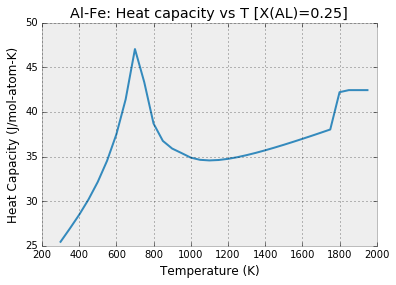

In [6]:
plt.gca().set_title('Al-Fe: Heat capacity vs T [X(AL)=0.25]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Heat Capacity (J/mol-atom-K)')
# np.squeeze is used to remove all dimensions of size 1
# For a 1-D/"step" calculation, this aligns the temperature and heat capacity arrays
# In 2-D/"map" calculations, we'd have to explicitly select the composition of interest
plt.plot(eq['T'].values, np.squeeze(eq['heat_capacity'].values))
plt.show()

To understand more about what's happening around 700 K, we plot the degree of ordering versus composition. Note that this plot excludes all other phases except `B2_BCC`. We observe the presence of disordered bcc (A2) until around 13% Al or Fe, when the phase begins to order.

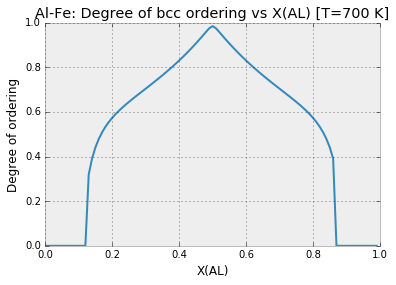

In [7]:
plt.gca().set_title('Al-Fe: Degree of bcc ordering vs X(AL) [T=700 K]')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('Degree of ordering')
# Generate a list of all indices where B2 is stable
phase_indices = np.nonzero(eq2.Phase.values == 'B2_BCC')
# phase_indices[2] refers to all composition indices
# We know this because pycalphad always returns indices in order like P, T, X's
plt.plot(np.take(eq2['X_AL'].values, phase_indices[2]), eq2['degree_of_ordering'].values[phase_indices])
plt.show()

## Al-Ni (Degree of Ordering)

In [9]:
db_alni = Database('NI_AL_DUPIN_2001.TDB')
phases = ['LIQUID', 'FCC_L12']
eq_alni = equilibrium(db_alni, ['AL', 'NI', 'VA'], phases, {v.X('AL'): 0.10, v.T: (300, 2500, 20), v.P: 101325},
                      output='degree_of_ordering')
print(eq_alni)

<xarray.Dataset>
Dimensions:             (P: 1, T: 110, X_AL: 1, component: 2, internal_dof: 5, vertex: 2)
Coordinates:
  * P                   (P) float64 1.013e+05
  * T                   (T) float64 300.0 320.0 340.0 360.0 380.0 400.0 ...
  * X_AL                (X_AL) float64 0.1
  * vertex              (vertex) int64 0 1
  * component           (component) object 'AL' 'NI'
  * internal_dof        (internal_dof) int64 0 1 2 3 4
Data variables:
    MU                  (P, T, X_AL, component) float64 -1.719e+05 ...
    GM                  (P, T, X_AL) float64 -2.526e+04 -2.585e+04 ...
    NP                  (P, T, X_AL, vertex) float64 0.3829 0.6171 0.3543 ...
    X                   (P, T, X_AL, vertex, component) float64 0.25 0.75 ...
    Y                   (P, T, X_AL, vertex, internal_dof) float64 1e-12 1.0 ...
    Phase               (P, T, X_AL, vertex) object 'FCC_L12' 'FCC_L12' ...
    degree_of_ordering  (P, T, X_AL, vertex) float64 1.0 7.962e-15 1.0 ...
Attributes:
    hu

### Plots
In the plot below we observe two phases designated `FCC_L12`. This is indicative of a miscibility gap. The ordered gamma-prime phase steadily decreases in amount with increasing temperature until it completely disappears around 750 K, leaving only the disordered gamma phase.

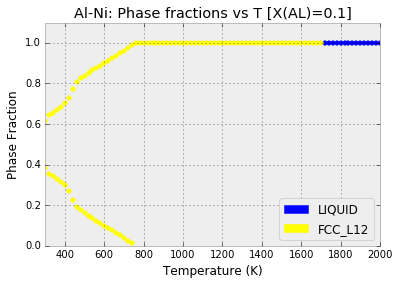

In [10]:
from pycalphad.plot.utils import phase_legend
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Al-Ni: Phase fractions vs T [X(AL)=0.1]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300, 2000))

for name in phases:
    phase_indices = np.nonzero(eq_alni.Phase.values == name)
    plt.scatter(np.take(eq_alni['T'].values, phase_indices[1]), eq_alni.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='lower right')

In the plot below we see that the degree of ordering does not change at all in each phase. There is a very abrupt disappearance of the completely ordered gamma-prime phase, leaving the completely disordered gamma phase. This is a first-order phase transition.

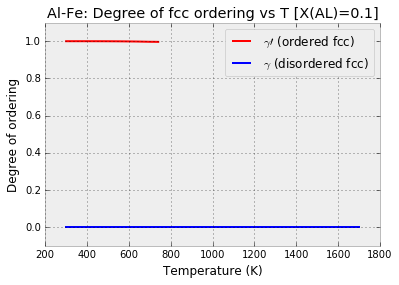

In [11]:
plt.gca().set_title('Al-Fe: Degree of fcc ordering vs T [X(AL)=0.1]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Degree of ordering')
plt.gca().set_ylim((-0.1,1.1))
# Generate a list of all indices where FCC_L12 is stable and ordered
L12_phase_indices = np.nonzero(np.logical_and((eq_alni.Phase.values == 'FCC_L12'),
                                              (eq_alni.degree_of_ordering.values > 0.01)))
# Generate a list of all indices where FCC_L12 is stable and disordered
fcc_phase_indices = np.nonzero(np.logical_and((eq_alni.Phase.values == 'FCC_L12'),
                                              (eq_alni.degree_of_ordering.values <= 0.01)))
# phase_indices[1] refers to all temperature indices
# We know this because pycalphad always returns indices in order like P, T, X's
plt.plot(np.take(eq_alni['T'].values, L12_phase_indices[1]), eq_alni['degree_of_ordering'].values[L12_phase_indices],
            label='$\gamma\prime$ (ordered fcc)', color='red')
plt.plot(np.take(eq_alni['T'].values, fcc_phase_indices[1]), eq_alni['degree_of_ordering'].values[fcc_phase_indices],
            label='$\gamma$ (disordered fcc)', color='blue')
plt.legend()
plt.show()